In [1]:
from Landscape import Landscape
from CogLandscape import CogLandscape
from BinaryLandscape import BinaryLandscape
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


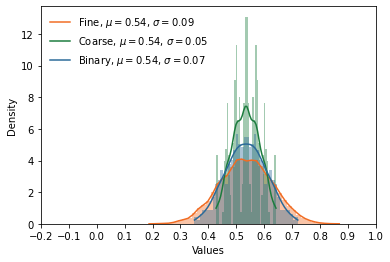

In [10]:
data_folder = r"E:\data\gst-0512\Landscapes"
N = 9
K = 0
state_num = 4
norm = "None"
np.random.seed(1024)
landscape = Landscape(N=N, K=K, state_num=state_num, norm=norm)  # 4^9
cog_landscape = CogLandscape(landscape=landscape, expertise_domain=list(range(N)),
                             expertise_representation=["A", "B"], norm=norm)  # 2^9
binary_landscape = BinaryLandscape(N=N, K=K, K_within=None, K_between=None, norm=norm)  # 2^9
data = list(landscape.cache.values())
cog_data = list(cog_landscape.cache.values())
bin_data = list(binary_landscape.cache.values())
# The density exceed 1 because the length of x-axis is 1 (too small); the area below the density curve must be 1
bins = 40
alpha = 0.4
# Hist 1: Multi-State Landscape
plt.hist(data, bins=bins, color=nature_orange, alpha=alpha, density=True)
kde1 = gaussian_kde(data)
x_values1 = np.linspace(min(data), max(data), bins)
pdf1 = kde1(x_values1)
plt.plot(x_values1, pdf1, '-', color=nature_orange,
         label='Fine, $\mu=${0}, $\sigma=${1}'.format(round(sum(data) / len(data), 2), round(float(np.std(data)), 2)))

# Hist 2: Cognitive Landscape
plt.hist(cog_data, bins=bins, color=nature_green, alpha=alpha, density=True)
kde2 = gaussian_kde(cog_data)
x_values2 = np.linspace(min(cog_data), max(cog_data), bins)
pdf2 = kde2(x_values2)
plt.plot(x_values2, pdf2, '-', color=nature_green,
         label='Coarse, $\mu=${0}, $\sigma=${1}'.format(round(sum(cog_data) / len(cog_data), 2), round(float(np.std(cog_data)), 2)))

# Hist 3: Binary Landscape
plt.hist(bin_data, bins=bins, alpha=alpha, color=nature_blue, density=True)
kde3 = gaussian_kde(bin_data)
x_values3 = np.linspace(min(bin_data), max(bin_data), bins)
pdf3 = kde3(x_values3)
plt.plot(x_values3, pdf3, '-', color=nature_blue,
         label='Binary, $\mu=${0}, $\sigma=${1}'.format(round(sum(bin_data) / len(bin_data), 2), round(float(np.std(bin_data)), 2)))

# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Density')
plt.xticks(np.arange(-0.2, 1.1, 0.1))
# plt.title('Landscape Distribution')
plt.legend(frameon=False, fontsize=10, loc='upper left')
plt.savefig(data_folder + r"\{2}_N{0}_K{1}.png".format(N, K, norm), transparent=True, dpi=300)
# Show the plot
plt.show()
# plt.clf()

In [ ]:
# Sample data for two distributions
data1 = [1, 2, 2, 3, 4, 4, 4, 5, 5, 6]
data2 = [2, 3, 3, 4, 5, 5, 6, 6, 7, 8, 8, 8, 9, 9]

# Estimating the probability density functions (PDFs)
pdf1 = gaussian_kde(data1)
pdf2 = gaussian_kde(data2)

# Creating a common support grid
x = np.linspace(min(min(data1), min(data2)), max(max(data1), max(data2)), num=100)

# Evaluating the PDFs on the common support grid
pdf1_vals = pdf1(x)
pdf2_vals = pdf2(x)

# Calculating the KL divergence
kl_divergence = kl_div(pdf1_vals, pdf2_vals).sum()

print(f"KL Divergence: {kl_divergence}")


In [ ]:

K_list = [0, 1, 2, 3, 4, 5, 6, 7, 8]
expertise_domain_list = [18, 12, 6]
for K in K_list:
    index = 0
    fig, ax = plt.subplots()
    for expertise_domain in expertise_domain_list:
        index += 1
        data_file = data_folder + r"\landscape_K_{0}_E_{1}".format(K, expertise_domain)
        with open(data_file, "rb") as infile:
            data = pickle.load(infile)
        plt.hist(data[0], bins=40, color=color_pairs[index][0], alpha=0.5, density=True, label='K{0}_E_{1}'.format(K, expertise_domain))
        kde_1 = gaussian_kde(data[0])
        x_values_1 = np.linspace(min(data[0]), max(data[0]), 40)
        pdf_1 = kde_1(x_values_1)
        plt.plot(x_values_1, pdf_1, '-', color=color_pairs[index][0])
        plt.hist(data[1], bins=40, color=color_pairs[index][1], alpha=0.5, density=True, label='Cog_K{0}_E_{1}'.format(K, expertise_domain))
        kde_2 = gaussian_kde(data[1])
        x_values_2 = np.linspace(min(data[1]), max(data[1]), 40)
        pdf_2 = kde_2(x_values_2)
        plt.plot(x_values_2, pdf_2, '-', color=color_pairs[index][1])
    # Add labels and legend
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title('Landscape Distribution')
    plt.legend(frameon=False, prop=legend_properties)
    plt.savefig(data_folder + r"\landscape_distributionK_{0}.png".format(K), transparent=True, dpi=300)
    plt.show()
    # plt.clf()